In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive'

'2022  YKS (1).docx'
'2022  YKS.docx'
'2022  YKS.gdoc'
'2022  YKS.pdf'
'2022  YKS.txt'
 22111010035_22111010064_22111010759_experiment_7.gdoc
 22111010035_22111010759_22111010064_experiment_8.gdoc
'Adsız doküman (1).gdoc'
'Adsız doküman (2).gdoc'
'Adsız doküman (3).gdoc'
'Adsız doküman (4).gdoc'
'Adsız doküman (5).gdoc'
'Adsız doküman (6).gdoc'
'Adsız doküman (7).gdoc'
'Adsız doküman.gdoc'
'BURS BELGE.zip'
 Classroom
'Colab Notebooks'
'CV ESENGÜL ALTINOK #1.gdoc'
'CV ESENGÜL ALTINOK #1.pdf'
'EEE223 24_25 Guz Experiment 1.gdoc'
'EEE223 24_25 Guz Experiment 5.gdoc'
'eee223_report_template (1).gdoc'
 eee223_report_template.gdoc
'ESENGÜL ALTINOK-RAPOR 1 (1).pdf'
'ESENGÜL ALTINOK-RAPOR 1.gdoc'
'ESENGÜL ALTINOK-RAPOR 1 .gdoc'
'Esengül ALTINOK-Writting Portfolio 2- 1st Draft (2).docx'
 Özgeçmiş.gdoc
'Özgeçmiş .gdoc'
'Özgeçmiş - Mercan (1).gdoc'
'Özgeçmiş - Mercan.gdoc'
 Problem_Set_1_merged.pdf
'Proje Teklifi.gdoc'
'rapor özet.gdoc'
 uribe-et-al-2024-publicly-availa

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os

In [48]:

data_dir = '/content/drive/MyDrive/Colab Notebooks/archive/OralCancer'
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')





In [49]:

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 101 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [50]:

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [51]:

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [52]:


epochs = 10
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.4905 - loss: 0.5758 - val_accuracy: 0.9583 - val_loss: 0.2246
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.8972 - loss: 0.4368 - val_accuracy: 0.9583 - val_loss: 0.2168
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9330 - loss: 0.3367 - val_accuracy: 0.9583 - val_loss: 0.1998
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.9239 - loss: 0.2926 - val_accuracy: 0.9583 - val_loss: 0.2065
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9239 - loss: 0.2690 - val_accuracy: 0.9583 - val_loss: 0.1968
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9413 - loss: 0.2478 - val_accuracy: 0.9583 - val_loss: 0.2314
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.9294 - loss: 0.2999 - val_accuracy: 0.9583 - val_loss: 0.1894
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - accuracy: 0.9396 - loss: 0.2964 - val_accuracy: 0.9583 - val_loss: 0.1998
Epoch 9/10
4/4 ━━━━━━

In [47]:

model.save('/content/drive/My Drive/oral_cancer_model.h5')


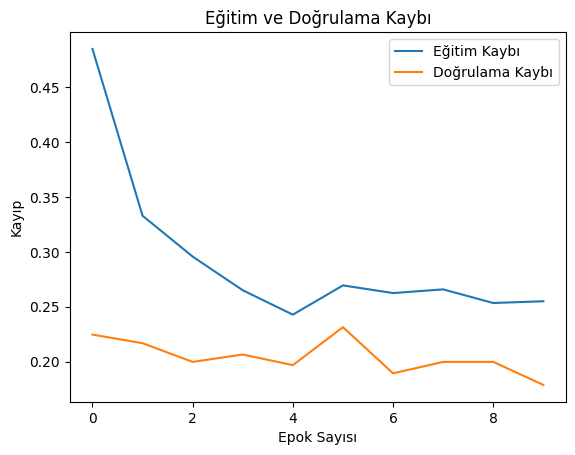

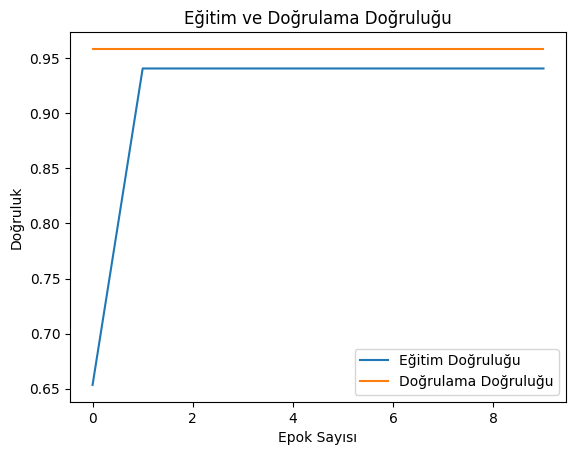

In [53]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.xlabel('Epok Sayısı')
plt.ylabel('Kayıp')
plt.legend()
plt.title('Eğitim ve Doğrulama Kaybı')
plt.show()


plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.xlabel('Epok Sayısı')
plt.ylabel('Doğruluk')
plt.legend()
plt.title('Eğitim ve Doğrulama Doğruluğu')
plt.show()


In [43]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 7 images belonging to 2 classes.
Found 118 images belonging to 2 classes.


In [44]:
test_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test Kaybı: {test_loss}')
print(f'Test Doğruluğu: {test_accuracy}')


Found 118 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 692ms/step - accuracy: 0.3471 - loss: 1.6013
Test Kaybı: 1.5405209064483643
Test Doğruluğu: 0.37288135290145874


4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 743ms/step


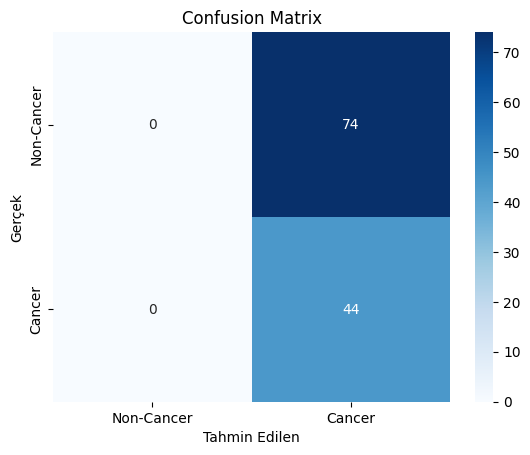

              precision    recall  f1-score   support

  Non-Cancer       0.00      0.00      0.00        74
      Cancer       0.37      1.00      0.54        44

    accuracy                           0.37       118
   macro avg       0.19      0.50      0.27       118
weighted avg       0.14      0.37      0.20       118



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [54]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns


test_generator.reset()
y_pred = model.predict(test_generator)
y_pred = np.round(y_pred).astype(int).flatten()  # Tahmin edilen sınıflar
y_true = test_generator.classes  # Gerçek sınıflar

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Cancer', 'Cancer'], yticklabels=['Non-Cancer', 'Cancer'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_true, y_pred, target_names=['Non-Cancer', 'Cancer']))


Found 118 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 622ms/step
Sınıflandırma Raporu:
              precision    recall  f1-score   support

      cancer       0.00      0.00      0.00        74
  non-cancer       0.37      1.00      0.54        44

    accuracy                           0.37       118
   macro avg       0.19      0.50      0.27       118
weighted avg       0.14      0.37      0.20       118



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


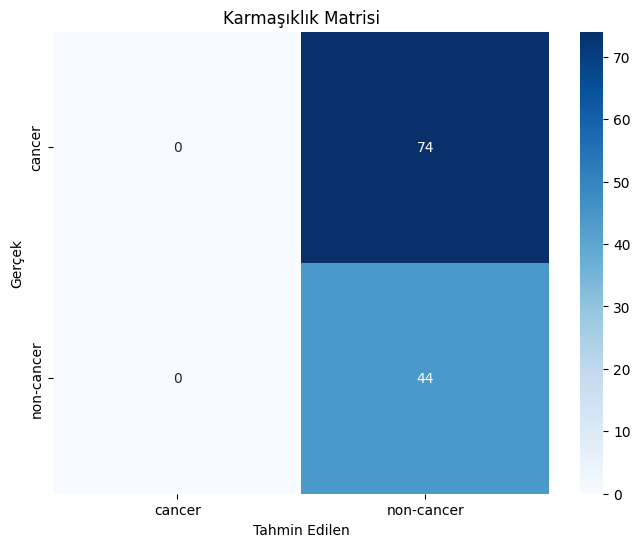

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


test_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)


test_generator.reset()
predictions = model.predict(test_generator)
y_pred = (predictions > 0.5).astype(int)  # 0.5 eşik değeriyle sınıfları
y_true = test_generator.classes  # Gerçek sınıflar


print("Sınıflandırma Raporu:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Karmaşıklık Matrisi')
plt.show()


In [56]:
!apt-get install git


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [57]:
!git config --global user.name "EsenALTINOK"
!git config --global user.email "altinokesengul06@gmail.com"


In [66]:
!git init
!git remote add origin github.com/EsenALTINOK/deeplearning.git



!git add .

!git branch -M main
!git push -u origin main

Reinitialized existing Git repository in /content/.git/
error: remote origin already exists.
error: open("drive/MyDrive/2022  YKS.gdoc"): Operation not supported
error: unable to index file 'drive/MyDrive/2022  YKS.gdoc'
fatal: adding files failed
error: src refspec main does not match any
error: failed to push some refs to 'https://https://github.com/EsenALTINOK/deeplearning.git'
